<h2><center>Quick, Draw! Doodle Recognition Challenge - Simple EDA</center></h2>

#### Here I'll do some simple analysis on the competition data set, if you have any suggestion or feedback please let me know in the comments.

### Dependencies

In [1]:
import os
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

pd.options.display.max_rows = 20
sns.set(style="darkgrid")
%matplotlib inline

### Load data

In [2]:
train_sample = pd.DataFrame()
files_directory = os.listdir("../input/train_simplified")
for file in files_directory:
    train_sample = train_sample.append(pd.read_csv('../input/train_simplified/' + file, index_col='key_id', nrows=10))
# Shuffle data
train_sample = shuffle(train_sample, random_state=123)

train = pd.DataFrame()
for file in files_directory[:185]:
    train = train.append(pd.read_csv('../input/train_simplified/' + file, index_col='key_id', usecols=[1, 2, 3, 5]))
# Shuffle data
train = shuffle(train, random_state=123)

### Let's take a look at the data

In [3]:
print('Train number of rows: ', train.shape[0])
print('Train number of columns: ', train_sample.shape[1])
print('Train set features: %s' % train_sample.columns.values)
print('Train number of label categories: %s' % len(files_directory))

Train number of rows:  27098813
Train number of columns:  5
Train set features: ['countrycode' 'drawing' 'recognized' 'timestamp' 'word']
Train number of label categories: 340


In [4]:
train_sample.head()

,countrycode,drawing,recognized,timestamp,word
key_id,,,,,
5195298416623616,US,"[[[138, 142, 155, 169, 194, 208, 222, 252], [2...",True,2017-01-27 21:17:42.705360,moustache
6425976948916224,US,"[[[155, 83, 43, 25, 8, 0, 0, 7, 20, 31, 73, 11...",True,2017-03-17 01:36:36.873220,submarine
6330653861740544,US,"[[[17, 112, 150, 195, 235, 249, 248, 255, 255,...",True,2017-01-31 02:55:34.729150,canoe
5542184314994688,US,"[[[1, 0, 4, 16, 40, 61, 80, 97, 119, 134, 148,...",True,2017-03-27 16:21:46.930400,necklace
5680045169311744,US,"[[[206, 200, 200, 193, 161, 160, 156, 129, 92,...",True,2017-01-26 16:04:40.555910,sock


Our dataset seems to be pretty simple, ids, timestamps, countrycodes what seems to really matters is the drawings values (arrays that represents the drawings), "recognized" that means if this drawing was recognized or not by the algorithm and "word" that is our labels, maybe "countrycode" and the timestamp may be cool features to play with as well.

### In case you wanna check the label count
 * I wold like to make a count plot of the label categories, but as we have 340 it would be a mess.

In [5]:
count_gp = train.groupby(['word']).size().reset_index(name='count').sort_values('count', ascending=False)
top_10 = count_gp[:10]
bottom_10 = count_gp[count_gp.shape[0]-10:count_gp.shape[0]]

### The top 10 words

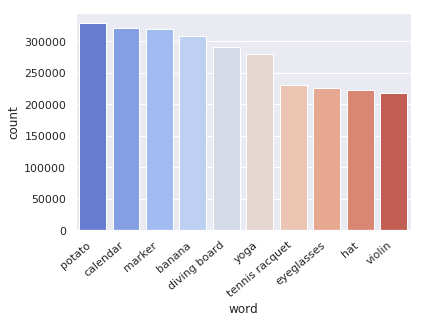

In [6]:
ax_t10 = sns.barplot(x="word", y="count", data=top_10, palette="coolwarm")
ax_t10.set_xticklabels(ax_t10.get_xticklabels(), rotation=40, ha="right")
plt.show()

### The bottom 10 words

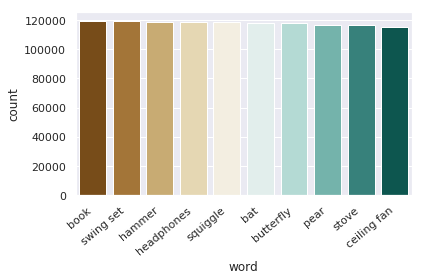

In [7]:
ax_b10 = sns.barplot(x="word", y="count", data=bottom_10, palette="BrBG")
ax_b10.set_xticklabels(ax_b10.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [8]:
count_gp

,word,count
125,potato,329204
36,calendar,321981
99,marker,319136
11,banana,307936
54,diving board,290239
182,yoga,280442
160,tennis racquet,231151
65,eyeglasses,225762
80,hat,222610
175,violin,217260


### Rate of recognized true/false rows

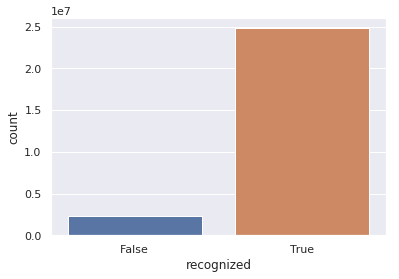

In [9]:
sns.countplot(x="recognized", data=train)
plt.show()

In [10]:
rec_gp = train.groupby(['word', 'recognized']).size().reset_index(name='count')
rec_true = rec_gp[(rec_gp['recognized'] == True)].rename(index=str, columns={"recognized": "recognized_true", "count": "count_true"})
rec_false = rec_gp[(rec_gp['recognized'] == False)].rename(index=str, columns={"recognized": "recognized_false", "count": "count_false"})
rec_gp = rec_true.set_index('word').join(rec_false.set_index('word'), on='word')
rec_gp

,recognized_true,count_true,recognized_false,count_false
word,,,,
The Great Wall of China,True,171064,False,21951
airplane,True,135823,False,15800
alarm clock,True,113911,False,9488
angel,True,127756,False,21980
animal migration,True,115949,False,21898
ant,True,115718,False,8894
anvil,True,117463,False,8768
apple,True,139902,False,4820
asparagus,True,146218,False,21884


### View data as  drawings

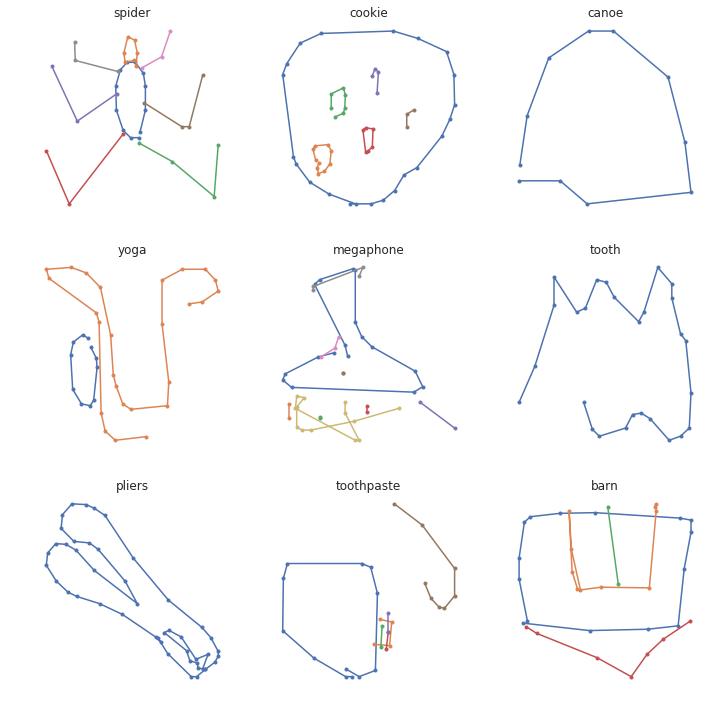

In [11]:
words = train['word'].tolist()
drawings = [ast.literal_eval(pts) for pts in train[:9]['drawing'].values]

plt.figure(figsize=(10, 10))
for i, drawing in enumerate(drawings):
    plt.subplot(330 + (i+1))
    for x,y in drawing:
        plt.plot(x, y, marker='.')
        plt.tight_layout()
        plt.title(words[i]);
        plt.axis('off')

As we can see some of these may be really hard to get good results with a model, other look a lot easier, what i think may be the challenge here is to get good results with this amount of label categories, some of them can get drawing that look a lot like others, but as we have lots of data, maybe something like deep learning may get good results.